# College Scorecard data

## Task Description

Filter all the repayment  related variables from the main college  scorecard data , conduct EDA, cluster the  data using  K-Means classification model and then visualize the results and how they are related to other variables

Data source: US Department of Education college Scorecard data

Main data url: https://collegescorecard.ed.gov/data/


Data dictinary url: https://collegescorecard.ed.gov/assets/CollegeScorecardDataDictionary.xlsx

Institution data file url: https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings='ignore'

%matplotlib inline

In [2]:
college_v= pd.read_csv('/Users/macos/Desktop/student crisis/CollegeScorecard_Raw_Data 2/MERGED2018_19_PP.csv')
college_w = pd.read_csv('/Users/macos/Desktop/student crisis/CollegeScorecard_Raw_Data 2/MERGED2017_18_PP.csv')
college_x = pd.read_csv('/Users/macos/Desktop/student crisis/CollegeScorecard_Raw_Data 2/MERGED2016_17_PP.csv')
college_y = pd.read_csv('/Users/macos/Desktop/student crisis/CollegeScorecard_Raw_Data 2/MERGED2015_16_PP.csv')
college_z= pd.read_csv('/Users/macos/Desktop/student crisis/CollegeScorecard_Raw_Data 2/MERGED2014_15_PP.csv')


/Users/macos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/macos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1729) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/macos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6,1729,1909,1910,1911,1912,1913) have mixed types.Specify dtype option on impor

In [3]:
college_v['FY']= '2018_19'
college_w['FY']= '2017_18'
college_x['FY']= '2016_17'
college_y['FY']= '2015_16'
college_z['FY']= '2014_15'

In [10]:
college_z['LATI'],college_z['LONG']=college_v['LATITUDE'],college_v['LONGITUDE']

In [12]:
college_y['LATI'],college_y['LONG']=college_v['LATITUDE'],college_v['LONGITUDE']

In [13]:
college_x['LATI'],college_x['LONG']=college_v['LATITUDE'],college_v['LONGITUDE']

In [14]:
college_w['LATI'],college_w['LONG']=college_v['LATITUDE'],college_v['LONGITUDE']

In [15]:
college_v['LATI'],college_v['LONG']=college_v['LATITUDE'],college_v['LONGITUDE']

In [16]:
# concat
dt_frame = [college_v,college_w,college_x,college_y,college_z]
df= pd.concat(dt_frame)

In [17]:
col_list= ['CONTROL','MAIN','ACCREDAGENCY','INSTNM','CITY','INSTURL', 'NPCURL', 
        'SCH_DEG','HCM2', 'LOCALE','LOCALE2','CCBASIC','CCUGPROF','CCSIZSET','HBCU','CDR2',
        'HIGHDEG','CDR3','RPY_1YR_RT','COMPL_RPY_1YR_RT','NONCOM_RPY_1YR_RT','LO_INC_RPY_1YR_RT','MD_INC_RPY_1YR_RT',
        'HI_INC_RPY_1YR_RT','DEP_RPY_1YR_RT','IND_RPY_1YR_RT','PELL_RPY_1YR_RT','NOPELL_RPY_1YR_RT','FEMALE_RPY_1YR_RT',
        'MALE_RPY_1YR_RT','FIRSTGEN_RPY_1YR_RT','NOTFIRSTGEN_RPY_1YR_RT','RPY_3YR_RT','COMPL_RPY_3YR_RT','NONCOM_RPY_3YR_RT',
        'LO_INC_RPY_3YR_RT','MD_INC_RPY_3YR_RT','HI_INC_RPY_3YR_RT','DEP_RPY_3YR_RT','IND_RPY_3YR_RT','PELL_RPY_3YR_RT',
    'NOPELL_RPY_3YR_RT','FEMALE_RPY_3YR_RT','MALE_RPY_3YR_RT',
 'FIRSTGEN_RPY_3YR_RT',
 'NOTFIRSTGEN_RPY_3YR_RT',
 'RPY_5YR_RT',
 'COMPL_RPY_5YR_RT',
 'NONCOM_RPY_5YR_RT',
 'LO_INC_RPY_5YR_RT',
 'MD_INC_RPY_5YR_RT',
 'HI_INC_RPY_5YR_RT',
 'DEP_RPY_5YR_RT',
 'IND_RPY_5YR_RT',
 'PELL_RPY_5YR_RT',
 'NOPELL_RPY_5YR_RT',
 'FEMALE_RPY_5YR_RT',
 'MALE_RPY_5YR_RT',
 'FIRSTGEN_RPY_5YR_RT',
 'NOTFIRSTGEN_RPY_5YR_RT',
 'RPY_7YR_RT',
 'COMPL_RPY_7YR_RT',
 'NONCOM_RPY_7YR_RT',
 'LO_INC_RPY_7YR_RT',
 'MD_INC_RPY_7YR_RT',
 'HI_INC_RPY_7YR_RT',
 'DEP_RPY_7YR_RT',
 'IND_RPY_7YR_RT',
 'PELL_RPY_7YR_RT',
 'NOPELL_RPY_7YR_RT',
 'FEMALE_RPY_7YR_RT',
 'MALE_RPY_7YR_RT',
 'FIRSTGEN_RPY_7YR_RT',
 'NOTFIRSTGEN_RPY_7YR_RT',
 'REPAY_DT_MDN',
 'REPAY_DT_N',
 'RPY_1YR_N',
 'COMPL_RPY_1YR_N',
 'NONCOM_RPY_1YR_N',
 'LO_INC_RPY_1YR_N',
 'MD_INC_RPY_1YR_N',
 'HI_INC_RPY_1YR_N',
 'DEP_RPY_1YR_N',
 'IND_RPY_1YR_N',
 'PELL_RPY_1YR_N',
 'NOPELL_RPY_1YR_N',
 'FEMALE_RPY_1YR_N',
 'MALE_RPY_1YR_N',
 'FIRSTGEN_RPY_1YR_N',
 'NOTFIRSTGEN_RPY_1YR_N',
 'RPY_3YR_N',
 'COMPL_RPY_3YR_N',
 'NONCOM_RPY_3YR_N',
 'LO_INC_RPY_3YR_N',
 'MD_INC_RPY_3YR_N',
 'HI_INC_RPY_3YR_N',
 'DEP_RPY_3YR_N',
 'IND_RPY_3YR_N',
 'PELL_RPY_3YR_N',
 'NOPELL_RPY_3YR_N',
 'FEMALE_RPY_3YR_N',
 'MALE_RPY_3YR_N',
 'FIRSTGEN_RPY_3YR_N',
 'NOTFIRSTGEN_RPY_3YR_N',
 'RPY_5YR_N',
 'COMPL_RPY_5YR_N',
 'NONCOM_RPY_5YR_N',
 'LO_INC_RPY_5YR_N',
 'MD_INC_RPY_5YR_N',
 'HI_INC_RPY_5YR_N',
 'DEP_RPY_5YR_N',
 'IND_RPY_5YR_N',
 'PELL_RPY_5YR_N',
 'NOPELL_RPY_5YR_N',
 'FEMALE_RPY_5YR_N',
 'MALE_RPY_5YR_N',
 'FIRSTGEN_RPY_5YR_N',
 'NOTFIRSTGEN_RPY_5YR_N',
 'RPY_7YR_N',
 'COMPL_RPY_7YR_N',
 'NONCOM_RPY_7YR_N',
 'LO_INC_RPY_7YR_N',
 'MD_INC_RPY_7YR_N',
 'HI_INC_RPY_7YR_N',
 'DEP_RPY_7YR_N',
 'IND_RPY_7YR_N',
 'PELL_RPY_7YR_N',
 'NOPELL_RPY_7YR_N',
 'FEMALE_RPY_7YR_N',
 'MALE_RPY_7YR_N',
 'FIRSTGEN_RPY_7YR_N',
 'NOTFIRSTGEN_RPY_7YR_N',
 'RPY_3YR_RT_SUPP',
 'LO_INC_RPY_3YR_RT_SUPP',
 'MD_INC_RPY_3YR_RT_SUPP',
 'HI_INC_RPY_3YR_RT_SUPP',
 'COMPL_RPY_3YR_RT_SUPP',
 'NONCOM_RPY_3YR_RT_SUPP',
 'DEP_RPY_3YR_RT_SUPP',
 'IND_RPY_3YR_RT_SUPP',
 'PELL_RPY_3YR_RT_SUPP',
 'NOPELL_RPY_3YR_RT_SUPP',
 'FEMALE_RPY_3YR_RT_SUPP',
 'MALE_RPY_3YR_RT_SUPP',
 'FIRSTGEN_RPY_3YR_RT_SUPP',
 'NOTFIRSTGEN_RPY_3YR_RT_SUPP',
 'CDR2_DENOM',
 'CDR3_DENOM','FY','LATI','LONG']
df_repay = df[col_list]



In [21]:
one=['CONTROL','MAIN','CITY','INSTNM','COMPL_RPY_1YR_RT','NONCOM_RPY_1YR_RT','LO_INC_RPY_1YR_RT','MD_INC_RPY_1YR_RT','HI_INC_RPY_1YR_RT',
'DEP_RPY_1YR_RT','IND_RPY_1YR_RT','PELL_RPY_1YR_RT','NOPELL_RPY_1YR_RT','FEMALE_RPY_1YR_RT','MALE_RPY_1YR_RT','FIRSTGEN_RPY_1YR_RT',
'NOTFIRSTGEN_RPY_1YR_RT','RPY_1YR_N','COMPL_RPY_1YR_N','NONCOM_RPY_1YR_N','LO_INC_RPY_1YR_N','MD_INC_RPY_1YR_N',
'HI_INC_RPY_1YR_N','DEP_RPY_1YR_N','IND_RPY_1YR_N','PELL_RPY_1YR_N','NOPELL_RPY_1YR_N','FEMALE_RPY_1YR_N','MALE_RPY_1YR_N',
'FIRSTGEN_RPY_1YR_N','NOTFIRSTGEN_RPY_1YR_N','RPY_1YR_N','FY','LATI','LONG']
one_year=df_repay[one]
one_year.rename(columns={'COMPL_RPY_1YR_RT':'COMPL_RPY_YR_RT','NONCOM_RPY_1YR_RT':'NONCOM_RPY_YR_RT','LO_INC_RPY_1YR_RT':'LO_INC_RPY_YR_RT',
                         'MD_INC_RPY_1YR_RT':'MD_INC_RPY_YR_RT','HI_INC_RPY_1YR_RT':'HI_INC_RPY_YR_RT',
                         'DEP_RPY_1YR_RT':'DEP_RPY_YR_RT','IND_RPY_1YR_RT':'IND_RPY_YR_RT','PELL_RPY_1YR_RT':'PELL_RPY_YR_RT',
                         'NOPELL_RPY_1YR_RT':'NOPELL_RPY_YR_RT','FEMALE_RPY_1YR_RT':'FEMALE_RPY_YR_RT','MALE_RPY_1YR_RT':'MALE_RPY_YR_RT',
                         'FIRSTGEN_RPY_1YR_RT':'FIRSTGEN_RPY_YR_RT','NOTFIRSTGEN_RPY_1YR_RT':'NOTFIRSTGEN_RPY_YR_RT',
                        'RPY_1YR_N':'RPY_YR_N','COMPL_RPY_1YR_N':'COMPL_RPY_YR_N','NONCOM_RPY_1YR_N':'NONCOM_RPY_YR_N','LO_INC_RPY_1YR_N':'LO_INC_RPY_YR_N',
                         'MD_INC_RPY_1YR_N':'MD_INC_RPY_YR_N','HI_INC_RPY_1YR_N':'HI_INC_RPY_YR_N','DEP_RPY_1YR_N':'DEP_RPY_YR_N',
                         'IND_RPY_1YR_N':'IND_RPY_YR_N','PELL_RPY_1YR_N':'PELL_RPY_YR_N','NOPELL_RPY_1YR_N':'NOPELL_RPY_YR_N',
                         'FEMALE_RPY_1YR_N':'FEMALE_RPY_YR_N','MALE_RPY_1YR_N':'MALE_RPY_YR_N','FIRSTGEN_RPY_1YR_N':'FIRSTGEN_RPY_YR_N',
'NOTFIRSTGEN_RPY_1YR_N':'NOTFIRSTGEN_RPY_YR_N'},inplace=True)
one_year.head(1)

/Users/macos/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CONTROL  MAIN    CITY                    INSTNM COMPL_RPY_YR_RT  \
0        1     1  Normal  Alabama A & M University             NaN   

  NONCOM_RPY_YR_RT LO_INC_RPY_YR_RT MD_INC_RPY_YR_RT HI_INC_RPY_YR_RT  \
0              NaN              NaN              NaN              NaN   

  DEP_RPY_YR_RT  ... PELL_RPY_YR_N NOPELL_RPY_YR_N FEMALE_RPY_YR_N  \
0           NaN  ...           NaN             NaN             NaN   

  MALE_RPY_YR_N FIRSTGEN_RPY_YR_N NOTFIRSTGEN_RPY_YR_N RPY_YR_N       FY  \
0           NaN               NaN                  NaN      NaN  2018_19   

        LATI       LONG  
0  34.783368 -86.568502  

[1 rows x 35 columns]

In [22]:
three=['CONTROL','MAIN','CITY','INSTNM','COMPL_RPY_3YR_RT','NONCOM_RPY_3YR_RT','LO_INC_RPY_3YR_RT','MD_INC_RPY_3YR_RT','HI_INC_RPY_3YR_RT',
'DEP_RPY_3YR_RT','IND_RPY_3YR_RT','PELL_RPY_3YR_RT','NOPELL_RPY_3YR_RT','FEMALE_RPY_3YR_RT','MALE_RPY_3YR_RT','FIRSTGEN_RPY_3YR_RT',
'NOTFIRSTGEN_RPY_3YR_RT','RPY_3YR_N','COMPL_RPY_3YR_N','NONCOM_RPY_3YR_N','LO_INC_RPY_3YR_N','MD_INC_RPY_3YR_N',
'HI_INC_RPY_3YR_N','DEP_RPY_3YR_N','IND_RPY_3YR_N','PELL_RPY_3YR_N','NOPELL_RPY_3YR_N','FEMALE_RPY_3YR_N','MALE_RPY_3YR_N',
'FIRSTGEN_RPY_3YR_N','NOTFIRSTGEN_RPY_3YR_N','RPY_3YR_N','FY','LATI','LONG']
three_year=df_repay[three]
three_year.rename(columns={'COMPL_RPY_3YR_RT':'COMPL_RPY_YR_RT','NONCOM_RPY_3YR_RT':'NONCOM_RPY_YR_RT','LO_INC_RPY_3YR_RT':'LO_INC_RPY_YR_RT',
                         'MD_INC_RPY_3YR_RT':'MD_INC_RPY_YR_RT','HI_INC_RPY_3YR_RT':'HI_INC_RPY_YR_RT',
                         'DEP_RPY_3YR_RT':'DEP_RPY_YR_RT','IND_RPY_3YR_RT':'IND_RPY_YR_RT','PELL_RPY_3YR_RT':'PELL_RPY_YR_RT',
                         'NOPELL_RPY_3YR_RT':'NOPELL_RPY_YR_RT','FEMALE_RPY_3YR_RT':'FEMALE_RPY_YR_RT','MALE_RPY_3YR_RT':'MALE_RPY_YR_RT',
                         'FIRSTGEN_RPY_3YR_RT':'FIRSTGEN_RPY_YR_RT','NOTFIRSTGEN_RPY_3YR_RT':'NOTFIRSTGEN_RPY_YR_RT',
                        'RPY_3YR_N':'RPY_YR_N','COMPL_RPY_3YR_N':'COMPL_RPY_YR_N','NONCOM_RPY_3YR_N':'NONCOM_RPY_YR_N','LO_INC_RPY_3YR_N':'LO_INC_RPY_YR_N',
                         'MD_INC_RPY_3YR_N':'MD_INC_RPY_YR_N','HI_INC_RPY_3YR_N':'HI_INC_RPY_YR_N','DEP_RPY_3YR_N':'DEP_RPY_YR_N',
                         'IND_RPY_3YR_N':'IND_RPY_YR_N','PELL_RPY_3YR_N':'PELL_RPY_YR_N','NOPELL_RPY_3YR_N':'NOPELL_RPY_YR_N',
                         'FEMALE_RPY_3YR_N':'FEMALE_RPY_YR_N','MALE_RPY_3YR_N':'MALE_RPY_YR_N','FIRSTGEN_RPY_3YR_N':'FIRSTGEN_RPY_YR_N',
'NOTFIRSTGEN_RPY_3YR_N':'NOTFIRSTGEN_RPY_YR_N'},inplace=True)
three_year.head(1)

/Users/macos/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CONTROL  MAIN    CITY                    INSTNM COMPL_RPY_YR_RT  \
0        1     1  Normal  Alabama A & M University             NaN   

  NONCOM_RPY_YR_RT LO_INC_RPY_YR_RT MD_INC_RPY_YR_RT HI_INC_RPY_YR_RT  \
0              NaN              NaN              NaN              NaN   

  DEP_RPY_YR_RT  ... PELL_RPY_YR_N NOPELL_RPY_YR_N FEMALE_RPY_YR_N  \
0           NaN  ...           NaN             NaN             NaN   

  MALE_RPY_YR_N FIRSTGEN_RPY_YR_N NOTFIRSTGEN_RPY_YR_N RPY_YR_N       FY  \
0           NaN               NaN                  NaN      NaN  2018_19   

        LATI       LONG  
0  34.783368 -86.568502  

[1 rows x 35 columns]

In [23]:
five=['CONTROL','MAIN','CITY','INSTNM','COMPL_RPY_5YR_RT','NONCOM_RPY_5YR_RT','LO_INC_RPY_5YR_RT','MD_INC_RPY_5YR_RT','HI_INC_RPY_5YR_RT',
'DEP_RPY_5YR_RT','IND_RPY_5YR_RT','PELL_RPY_5YR_RT','NOPELL_RPY_5YR_RT','FEMALE_RPY_5YR_RT','MALE_RPY_5YR_RT','FIRSTGEN_RPY_5YR_RT',
'NOTFIRSTGEN_RPY_5YR_RT','RPY_5YR_N','COMPL_RPY_5YR_N','NONCOM_RPY_5YR_N','LO_INC_RPY_5YR_N','MD_INC_RPY_5YR_N','HI_INC_RPY_5YR_N'
,'DEP_RPY_5YR_N','IND_RPY_5YR_N','PELL_RPY_5YR_N','NOPELL_RPY_5YR_N','FEMALE_RPY_5YR_N','MALE_RPY_5YR_N','FIRSTGEN_RPY_5YR_N',
'NOTFIRSTGEN_RPY_5YR_N','RPY_5YR_N','FY','LATI','LONG']
five_year=df_repay[five]
five_year.rename(columns={'COMPL_RPY_5YR_RT':'COMPL_RPY_YR_RT','NONCOM_RPY_5YR_RT':'NONCOM_RPY_YR_RT','LO_INC_RPY_5YR_RT':'LO_INC_RPY_YR_RT',
                         'MD_INC_RPY_5YR_RT':'MD_INC_RPY_YR_RT','HI_INC_RPY_5YR_RT':'HI_INC_RPY_YR_RT',
                         'DEP_RPY_5YR_RT':'DEP_RPY_YR_RT','IND_RPY_5YR_RT':'IND_RPY_YR_RT','PELL_RPY_5YR_RT':'PELL_RPY_YR_RT',
                         'NOPELL_RPY_5YR_RT':'NOPELL_RPY_YR_RT','FEMALE_RPY_5YR_RT':'FEMALE_RPY_YR_RT','MALE_RPY_5YR_RT':'MALE_RPY_YR_RT',
                         'FIRSTGEN_RPY_5YR_RT':'FIRSTGEN_RPY_YR_RT','NOTFIRSTGEN_RPY_5YR_RT':'NOTFIRSTGEN_RPY_YR_RT',
                        'RPY_5YR_N':'RPY_YR_N','COMPL_RPY_5YR_N':'COMPL_RPY_YR_N','NONCOM_RPY_5YR_N':'NONCOM_RPY_YR_N','LO_INC_RPY_5YR_N':'LO_INC_RPY_YR_N',
                         'MD_INC_RPY_5YR_N':'MD_INC_RPY_YR_N','HI_INC_RPY_5YR_N':'HI_INC_RPY_YR_N','DEP_RPY_5YR_N':'DEP_RPY_YR_N',
                         'IND_RPY_5YR_N':'IND_RPY_YR_N','PELL_RPY_5YR_N':'PELL_RPY_YR_N','NOPELL_RPY_5YR_N':'NOPELL_RPY_YR_N',
                         'FEMALE_RPY_5YR_N':'FEMALE_RPY_YR_N','MALE_RPY_5YR_N':'MALE_RPY_YR_N','FIRSTGEN_RPY_5YR_N':'FIRSTGEN_RPY_YR_N',
'NOTFIRSTGEN_RPY_5YR_N':'NOTFIRSTGEN_RPY_YR_N'},inplace=True)
five_year.head(1)

/Users/macos/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CONTROL  MAIN    CITY                    INSTNM COMPL_RPY_YR_RT  \
0        1     1  Normal  Alabama A & M University             NaN   

  NONCOM_RPY_YR_RT LO_INC_RPY_YR_RT MD_INC_RPY_YR_RT HI_INC_RPY_YR_RT  \
0              NaN              NaN              NaN              NaN   

  DEP_RPY_YR_RT  ... PELL_RPY_YR_N NOPELL_RPY_YR_N FEMALE_RPY_YR_N  \
0           NaN  ...           NaN             NaN             NaN   

  MALE_RPY_YR_N FIRSTGEN_RPY_YR_N NOTFIRSTGEN_RPY_YR_N RPY_YR_N       FY  \
0           NaN               NaN                  NaN      NaN  2018_19   

        LATI       LONG  
0  34.783368 -86.568502  

[1 rows x 35 columns]

In [24]:
seven=['CONTROL','MAIN','CITY','INSTNM','COMPL_RPY_7YR_RT','NONCOM_RPY_7YR_RT','LO_INC_RPY_7YR_RT','MD_INC_RPY_7YR_RT','HI_INC_RPY_7YR_RT',
'DEP_RPY_7YR_RT','IND_RPY_7YR_RT','PELL_RPY_7YR_RT','NOPELL_RPY_7YR_RT','FEMALE_RPY_7YR_RT','MALE_RPY_7YR_RT','FIRSTGEN_RPY_7YR_RT',
'NOTFIRSTGEN_RPY_7YR_RT','RPY_7YR_N','COMPL_RPY_7YR_N','NONCOM_RPY_7YR_N','LO_INC_RPY_7YR_N','MD_INC_RPY_7YR_N','HI_INC_RPY_7YR_N',
'DEP_RPY_7YR_N','IND_RPY_7YR_N','PELL_RPY_7YR_N','NOPELL_RPY_7YR_N','FEMALE_RPY_7YR_N','MALE_RPY_7YR_N','FIRSTGEN_RPY_7YR_N',
'NOTFIRSTGEN_RPY_7YR_N','RPY_7YR_N','FY','LATI','LONG']
seven_year=df_repay[seven] 
seven_year.rename(columns={'COMPL_RPY_7YR_RT':'COMPL_RPY_YR_RT','NONCOM_RPY_7YR_RT':'NONCOM_RPY_YR_RT','LO_INC_RPY_7YR_RT':'LO_INC_RPY_YR_RT',
                         'MD_INC_RPY_7YR_RT':'MD_INC_RPY_YR_RT','HI_INC_RPY_7YR_RT':'HI_INC_RPY_YR_RT',
                         'DEP_RPY_7YR_RT':'DEP_RPY_YR_RT','IND_RPY_7YR_RT':'IND_RPY_YR_RT','PELL_RPY_7YR_RT':'PELL_RPY_YR_RT',
                         'NOPELL_RPY_7YR_RT':'NOPELL_RPY_YR_RT','FEMALE_RPY_7YR_RT':'FEMALE_RPY_YR_RT','MALE_RPY_7YR_RT':'MALE_RPY_YR_RT',
                         'FIRSTGEN_RPY_7YR_RT':'FIRSTGEN_RPY_YR_RT','NOTFIRSTGEN_RPY_7YR_RT':'NOTFIRSTGEN_RPY_YR_RT',
                        'RPY_7YR_N':'RPY_YR_N','COMPL_RPY_7YR_N':'COMPL_RPY_YR_N','NONCOM_RPY_7YR_N':'NONCOM_RPY_YR_N','LO_INC_RPY_7YR_N':'LO_INC_RPY_YR_N',
                         'MD_INC_RPY_7YR_N':'MD_INC_RPY_YR_N','HI_INC_RPY_7YR_N':'HI_INC_RPY_YR_N','DEP_RPY_7YR_N':'DEP_RPY_YR_N',
                         'IND_RPY_7YR_N':'IND_RPY_YR_N','PELL_RPY_7YR_N':'PELL_RPY_YR_N','NOPELL_RPY_7YR_N':'NOPELL_RPY_YR_N',
                         'FEMALE_RPY_7YR_N':'FEMALE_RPY_YR_N','MALE_RPY_7YR_N':'MALE_RPY_YR_N','FIRSTGEN_RPY_7YR_N':'FIRSTGEN_RPY_YR_N',
'NOTFIRSTGEN_RPY_7YR_N':'NOTFIRSTGEN_RPY_YR_N'},inplace=True)
seven_year.head(1)

/Users/macos/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


CONTROL  MAIN    CITY                    INSTNM COMPL_RPY_YR_RT  \
0        1     1  Normal  Alabama A & M University             NaN   

  NONCOM_RPY_YR_RT LO_INC_RPY_YR_RT MD_INC_RPY_YR_RT HI_INC_RPY_YR_RT  \
0              NaN              NaN              NaN              NaN   

  DEP_RPY_YR_RT  ... PELL_RPY_YR_N NOPELL_RPY_YR_N FEMALE_RPY_YR_N  \
0           NaN  ...           NaN             NaN             NaN   

  MALE_RPY_YR_N FIRSTGEN_RPY_YR_N NOTFIRSTGEN_RPY_YR_N RPY_YR_N       FY  \
0           NaN               NaN                  NaN      NaN  2018_19   

        LATI       LONG  
0  34.783368 -86.568502  

[1 rows x 35 columns]

In [25]:
one_year.replace('PrivacySuppressed',0,inplace=True)



/Users/macos/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [26]:
three_year.replace('PrivacySuppressed',0,inplace=True)

In [27]:
five_year.replace('PrivacySuppressed',0,inplace=True)

In [28]:
seven_year.replace('PrivacySuppressed',0,inplace=True)

In [29]:
one_fy=one_year.dropna()

In [30]:
three_fy=three_year.dropna()

In [31]:
five_fy=three_year.dropna()

In [32]:
seven_fy=three_year.dropna()

In [33]:
one_fy['YEAR_CATEGORY']= 'ONE'

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
three_fy['YEAR_CATEGORY']= 'THREE'

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
five_fy['YEAR_CATEGORY']= 'FIVE'

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
seven_fy['YEAR_CATEGORY']= 'SEVEN'

/Users/macos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
# Combine the dataframes
otfs=[one_fy,three_fy,five_fy,seven_fy]
new_df= pd.concat(otfs)

In [38]:
C = new_df.drop(['CONTROL','MAIN','CITY','INSTNM','FY','YEAR_CATEGORY','LATI','LONG'],axis=1)

In [39]:
X = C.apply(pd.to_numeric, errors='coerce')


# K-Means

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [41]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

/Users/macos/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/macos/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [42]:
# Create k-mean object with 5 clusters
clt = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

# Train model
model = clt.fit(X_std)

In [43]:
Y = pd.DataFrame(model.labels_)
X['GROUP']=Y

In [44]:
X['CONTROL']=new_df['CONTROL']
X['MAIN']=new_df['MAIN']
X['CITY']=new_df['CITY']
X['INSTNM']=new_df['INSTNM']
X['YEAR_CATEGORY']=new_df['YEAR_CATEGORY']
X['FY']=new_df['FY']
X['LATI']=new_df['LATI']

X['LONG']=new_df['LONG']



In [45]:
 X.to_csv('long_lati_grouped.csv')

In [46]:
new=pd.read_csv('long_lati_grouped.csv')
new.drop(['Unnamed: 0'],axis=1,inplace=True)
new.head(1)

COMPL_RPY_YR_RT  NONCOM_RPY_YR_RT  LO_INC_RPY_YR_RT  MD_INC_RPY_YR_RT  \
0         0.336676          0.111892          0.141439           0.22327   

   HI_INC_RPY_YR_RT  DEP_RPY_YR_RT  IND_RPY_YR_RT  PELL_RPY_YR_RT  \
0              0.24        0.16845       0.200501        0.157704   

   NOPELL_RPY_YR_RT  FEMALE_RPY_YR_RT  ...  RPY_YR_N.1  GROUP  CONTROL  MAIN  \
0          0.277612          0.174543  ...        2548      2        1     1   

     CITY                    INSTNM  YEAR_CATEGORY       FY       LATI  \
0  Normal  Alabama A & M University            ONE  2014_15  34.783368   

        LONG  
0 -86.568502  

[1 rows x 37 columns]

In [49]:
gg = new.groupby('GROUP').CONTROL.sum() #grouped sum of non-completers rate at GROUP LEVEL
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Group')
ax1.set_ylabel('CONTROL')
ax1.set_title("Non-completer rate agaisnts Clusters",fontsize=16)
gg.plot(kind='bar')

In [50]:
new.CONTROL.value_counts()

3    23771
1    16687
2    16050
Name: CONTROL, dtype: int64

In [51]:
# CONTROL 1(Public) ,2(Privat non-profit), 3(Private for-profit) 4(Foreign)
fig = plt.figure()


hh=new.groupby(['CONTROL','GROUP']).NONCOM_RPY_YR_RT.sum()
hh.unstack().plot(kind='bar',stacked=True, color=['blue','red','green','purple','brown'],grid=True)
plt.title('Grouping of the 5 five categories based on institution types',fontsize=16)

Text(0.5, 1.0, 'Grouping of the 5 five categories based on institution types')

<Figure size 432x288 with 0 Axes>

In [12]:
# MAIN campus is represented by 1 and branch campuses represented by 0
hh=new.groupby(['MAIN','CONTROL']).NONCOM_RPY_YR_RT.sum()
hh.unstack().plot(kind='bar',stacked=True, color=['lightblue','lightgreen','darkgreen'],grid=True)
plt.title('Non-completers rate on campuses based on institution type',fontsize=16)
plt.ylabel('CONTROL')

Text(0, 0.5, 'CONTROL')

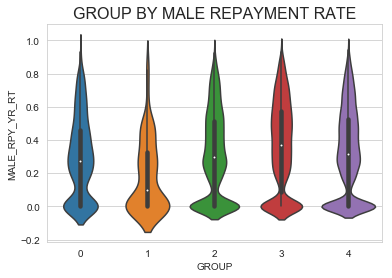

In [53]:

sns.violinplot(x='GROUP',y='MALE_RPY_YR_RT', data=new) 
plt.title('GROUP BY MALE REPAYMENT RATE',fontsize=16)
plt.show()
sns.violinplot(x='GROUP',y='FEMALE_RPY_YR_RT', data=new)
plt.title('GROUP BY FEMALE REPAYMENT RATE',fontsize=16)
plt.show()

* The white dot represents the median of repayment rate of both Gender

* The edges of the thicker dark line represent the quartiles of repayment rate.

* The edges of the violin-shaped structure represents the minimum and maximum repayment rate

* The width of the shape represents the density/frequency of data points at that value.In both categories of gender group 1 have a higher ratio

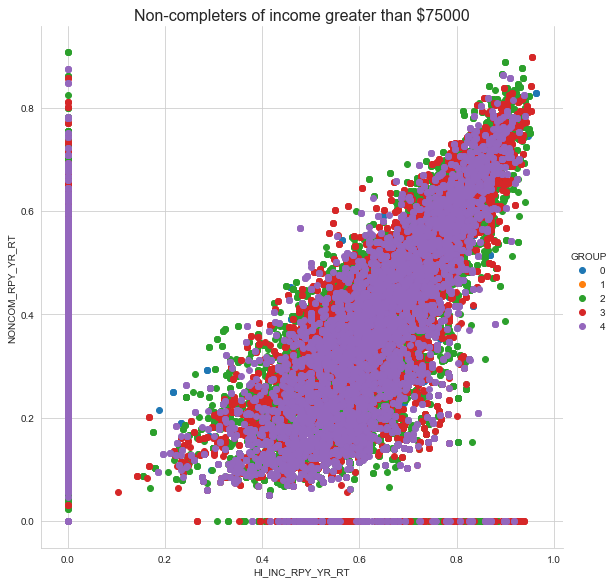

In [9]:
sns.FacetGrid(new, hue="GROUP", height=8) \
   .map(plt.scatter, "LO_INC_RPY_YR_RT", "NONCOM_RPY_YR_RT") \
   .add_legend();
plt.title('Non-completers of income $0_30000',fontsize=16)
plt.show()
sns.FacetGrid(new, hue="GROUP", height=8) \
   .map(plt.scatter, "MD_INC_RPY_YR_RT", "NONCOM_RPY_YR_RT") \
   .add_legend();
plt.title('Non-completers of income $30000_75000',fontsize=16)

plt.show()
sns.FacetGrid(new, hue="GROUP", height=8) \
   .map(plt.scatter, "HI_INC_RPY_YR_RT", "NONCOM_RPY_YR_RT") \
   .add_legend();
plt.title('Non-completers of income greater than $75000',fontsize=16)

plt.show()

In [10]:
c_one=new[new.YEAR_CATEGORY=='ONE']
c_three=new[new.YEAR_CATEGORY=='THREE']
c_five=new[new.YEAR_CATEGORY=='FIVE']
c_seven=new[new.YEAR_CATEGORY=='SEVEN']

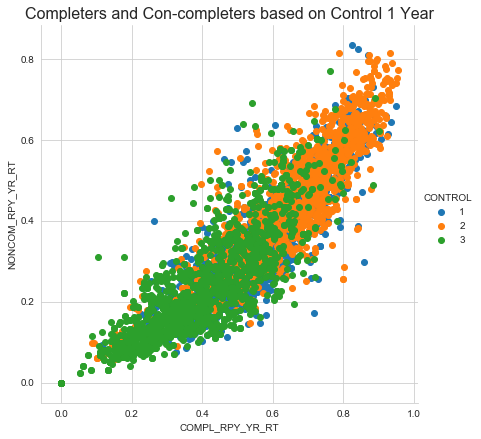

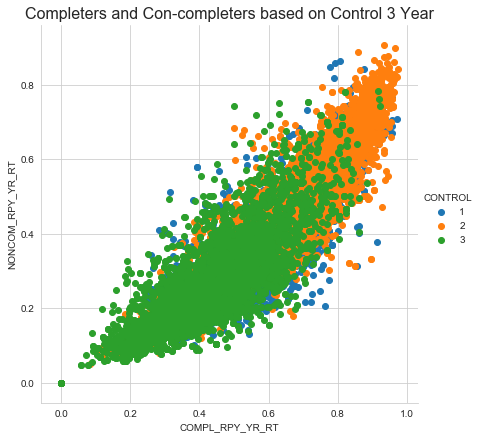

In [11]:
 sns.FacetGrid(c_one, hue="CONTROL", height=6) \
    .map(plt.scatter, "COMPL_RPY_YR_RT", "NONCOM_RPY_YR_RT") \
    .add_legend();
plt.title('Completers and Con-completers based on Control 1 Year',fontsize=16)
plt.show()
sns.FacetGrid(c_three, hue="CONTROL", height=6) \
    .map(plt.scatter, "COMPL_RPY_YR_RT", "NONCOM_RPY_YR_RT") \
    .add_legend();
plt.title('Completers and Con-completers based on Control 3 Year',fontsize=16)
plt.show()


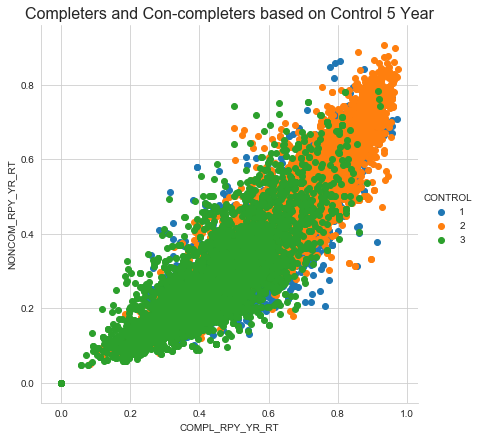

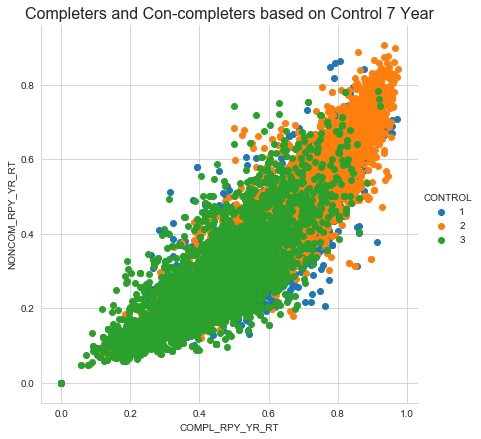

In [12]:
sns.FacetGrid(c_five, hue="CONTROL", height=6) \
   .map(plt.scatter, "COMPL_RPY_YR_RT", "NONCOM_RPY_YR_RT") \
   .add_legend();
plt.title('Completers and Con-completers based on Control 5 Year',fontsize=16)
plt.show()
sns.FacetGrid(c_seven, hue="CONTROL", height=6) \
   .map(plt.scatter, "COMPL_RPY_YR_RT", "NONCOM_RPY_YR_RT") \
   .add_legend();
plt.title('Completers and Con-completers based on Control 7 Year',fontsize=16)
plt.show()

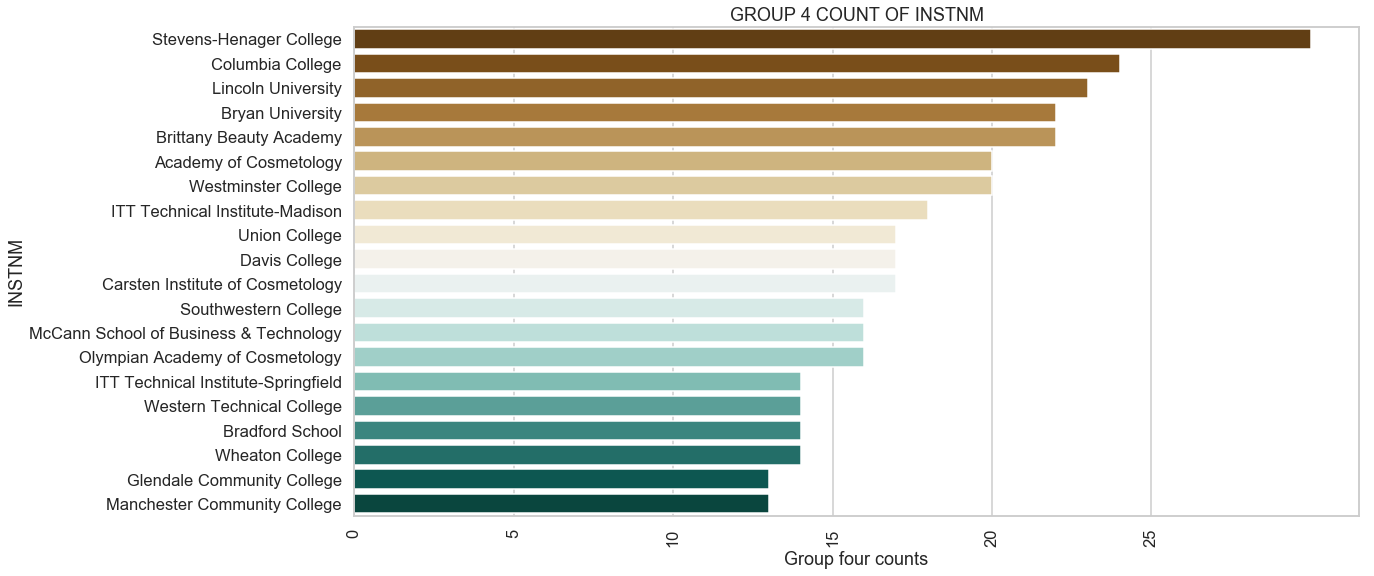

In [13]:
four=new[new.GROUP==4]
# four.INSTNM.value_counts()
CIP_name_below = four['INSTNM'].value_counts()[:20]
plt.figure(figsize = (18,9))
sns.set_context("talk")
sns.barplot(x = CIP_name_below , y = CIP_name_below.index,palette = "BrBG")
plt.xticks(np.arange(0,30,5),rotation = 90)
plt.xlabel("Group four counts")
plt.ylabel("INSTNM")
plt.title("GROUP 4 COUNT OF INSTNM")

plt.show()

In [16]:
two=new[new.GROUP==1]
# four.INSTNM.value_counts()
CIP_name_below = two['INSTNM'].value_counts()[:20]
plt.figure(figsize = (18,9))
sns.set_context("talk")
sns.barplot(x = CIP_name_below , y = CIP_name_below.index,palette = "plasma")
plt.xticks(np.arange(0,10,2),rotation = 90)
plt.xlabel("Group two counts")
plt.ylabel("INSTNM")
plt.title("GROUP 1 COUNT OF INSTNM")

plt.show()


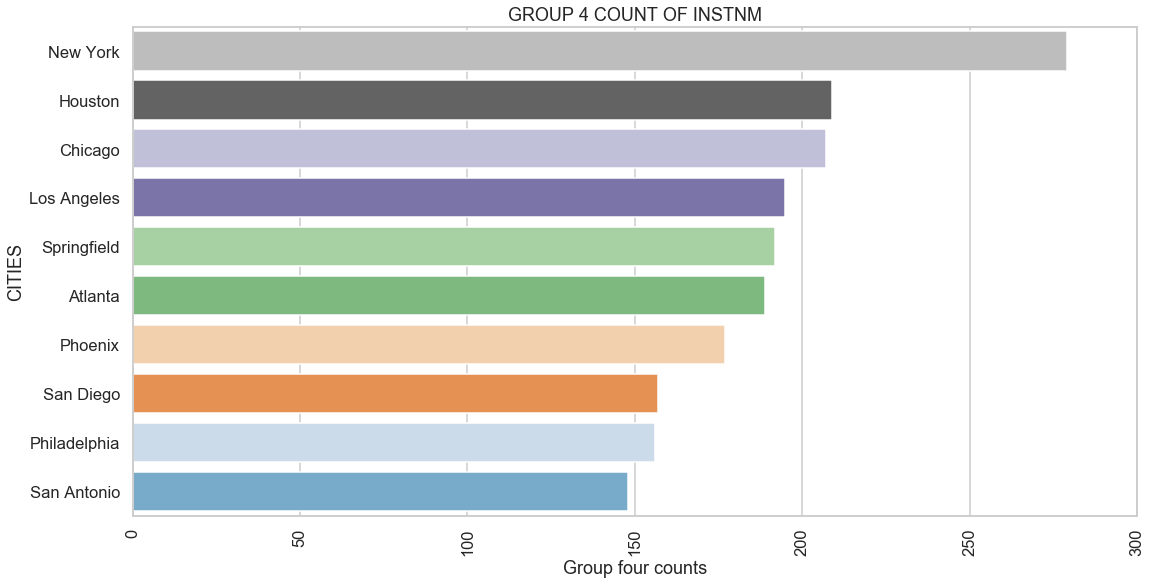

In [19]:
four=new[new.GROUP==4]
# four.INSTNM.value_counts()
CIP_name_below = four['CITY'].value_counts()[:10]
plt.figure(figsize = (18,9))
sns.set_context("talk")
sns.barplot(x = CIP_name_below , y = CIP_name_below.index,palette = "tab20c_r")
plt.xticks(np.arange(0,350,50),rotation = 90)
plt.xlabel("Group four counts")
plt.ylabel("CITIES")
plt.title("GROUP 4 COUNT OF INSTNM")

plt.show()

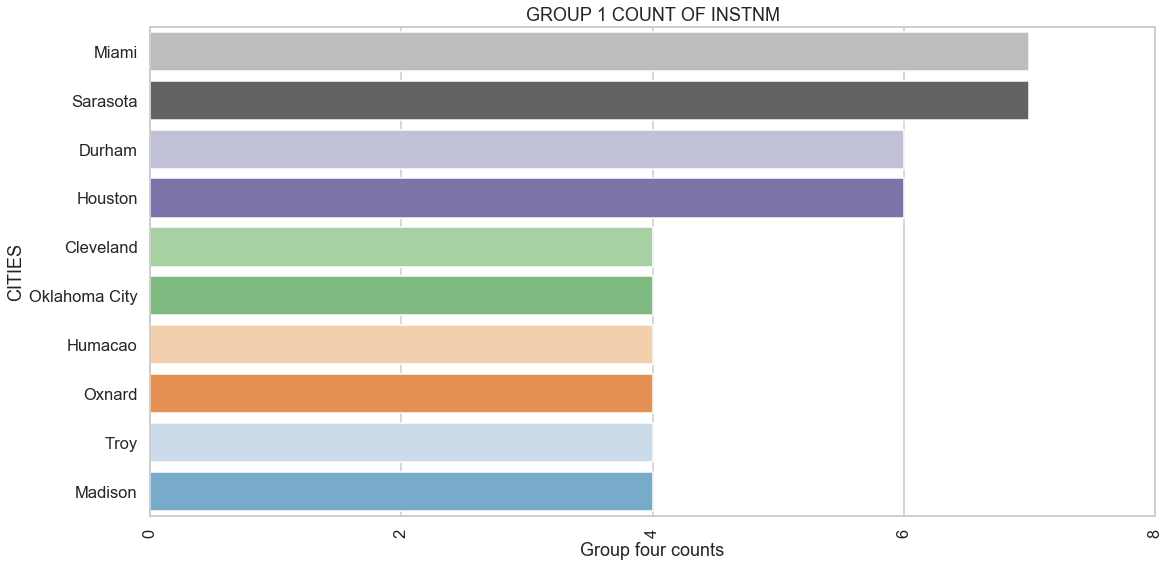

In [20]:
three=new[new.GROUP==1]
# four.INSTNM.value_counts()
CIP_name_below = three['CITY'].value_counts()[:10]
plt.figure(figsize = (18,9))
sns.set_context("talk")
sns.barplot(x = CIP_name_below , y = CIP_name_below.index,palette = "tab20c_r")
plt.xticks(np.arange(0,10,2),rotation = 90)
plt.xlabel("Group four counts")
plt.ylabel("CITIES")
plt.title("GROUP 1 COUNT OF INSTNM")

plt.show()

In [27]:
#PELL STUDENTS are students who are in a financcial need to support their education fee.
hh=new.groupby(['MAIN','CONTROL']).NOPELL_RPY_YR_N.sum()
hh.unstack().plot(kind='bar',stacked=True,color=['lightblue','lightgreen','darkgreen'],grid=True)
plt.title('No-pell students on campuses based on institution type',fontsize=18)
plt.ylabel('CONTROL')

Text(0, 0.5, 'CONTROL')

No pell students prefer branch(Non-main campus institutions) mojority prefer private for profit(3)

* Assumption

 -They are either cheap
 
 -They student take lesser time to complete their students
 
 

Text(0, 0.5, 'CONTROL')

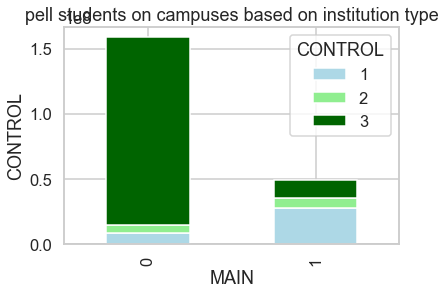

In [26]:
#PELL STUDENTS are students who are in a financcial need to support their education fee.
hh=new.groupby(['MAIN','CONTROL']).PELL_RPY_YR_N.sum()
hh.unstack().plot(kind='bar',stacked=True,color=['lightblue','lightgreen','darkgreen'],grid=True)
plt.title('pell students on campuses based on institution type',fontsize=18)
plt.ylabel('CONTROL')

Text(0, 0.5, 'CONTROL')

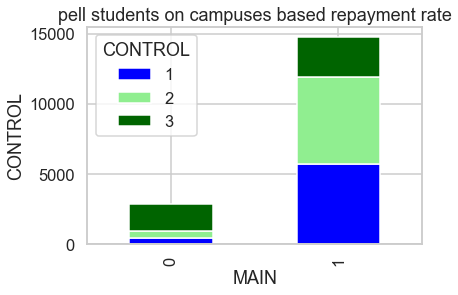

In [28]:
#PELL STUDENTS are students who are in a financcial need to support their education fee.
hh=new.groupby(['MAIN','CONTROL']).PELL_RPY_YR_RT.sum()
hh.unstack().plot(kind='bar',stacked=True,color=['blue','lightgreen','darkgreen'],grid=True)
plt.title('pell students on campuses based repayment rate',fontsize=18)
plt.ylabel('CONTROL')

Text(0, 0.5, 'CONTROL')

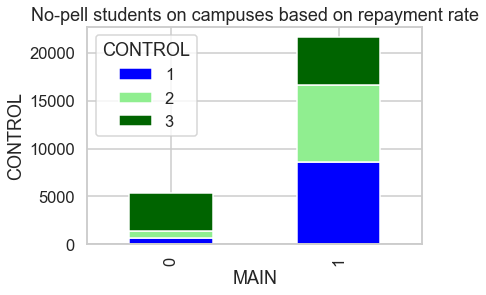

In [29]:
#PELL STUDENTS are students who are in a financcial need to support their education fee.
hh=new.groupby(['MAIN','CONTROL']).NOPELL_RPY_YR_RT.sum()
hh.unstack().plot(kind='bar',stacked=True,color=['blue','lightgreen','darkgreen'],grid=True)
plt.title('No-pell students on campuses based on repayment rate',fontsize=18)
plt.ylabel('CONTROL')

Something interesting from the above 4 graphs.

* The first two graphs shows the number of pell and non-pell student are from setallite campuses

* But the repayment rate is higher in main campus

Text(0, 0.5, 'CONTROL')

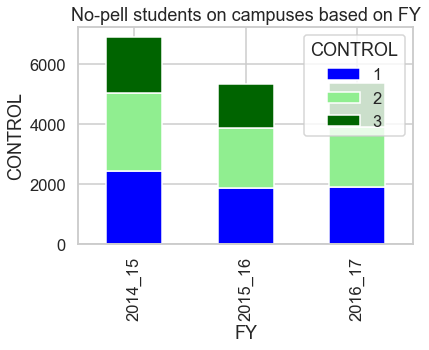

In [31]:
#PELL STUDENTS are students who are in a financcial need to support their education fee.
hh=new.groupby(['FY','CONTROL']).PELL_RPY_YR_RT.sum()
hh.unstack().plot(kind='bar',stacked=True,color=['blue','lightgreen','darkgreen'],grid=True)
plt.title('No-pell students on campuses based on FY',fontsize=18)
plt.ylabel('CONTROL')

In [81]:
new.to_csv('cleaned.csv')

# MAP 

In [1]:
#!pip install geoviews


In [73]:
new.columns

Index(['COMPL_RPY_YR_RT', 'NONCOM_RPY_YR_RT', 'LO_INC_RPY_YR_RT',
       'MD_INC_RPY_YR_RT', 'HI_INC_RPY_YR_RT', 'DEP_RPY_YR_RT',
       'IND_RPY_YR_RT', 'PELL_RPY_YR_RT', 'NOPELL_RPY_YR_RT',
       'FEMALE_RPY_YR_RT', 'MALE_RPY_YR_RT', 'FIRSTGEN_RPY_YR_RT',
       'NOTFIRSTGEN_RPY_YR_RT', 'RPY_YR_N', 'COMPL_RPY_YR_N',
       'NONCOM_RPY_YR_N', 'LO_INC_RPY_YR_N', 'MD_INC_RPY_YR_N',
       'HI_INC_RPY_YR_N', 'DEP_RPY_YR_N', 'IND_RPY_YR_N', 'PELL_RPY_YR_N',
       'NOPELL_RPY_YR_N', 'FEMALE_RPY_YR_N', 'MALE_RPY_YR_N',
       'FIRSTGEN_RPY_YR_N', 'NOTFIRSTGEN_RPY_YR_N', 'RPY_YR_N.1', 'GROUP',
       'CONTROL', 'MAIN', 'CITY', 'INSTNM', 'YEAR_CATEGORY', 'FY', 'LATI',
       'LONG'],
      dtype='object')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
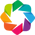

In [1]:
import geoviews as gv
import geoviews.tile_sources as gvts
from geoviews import dim
from geoviews import opts
gv.extension('bokeh')

In [3]:
import pandas as pd
import numpy as np
new=pd.read_csv('cleaned.csv')

In [4]:
# our pointers functions is geoviews.Points
df_point=gv.Points(new,['LONG','LATI'],['CITY','PELL_RPY_YR_N','MAIN','CONTROL','INSTNM'])

In [5]:
# points that will help on the map we need
gvts.tile_sources

{'CartoDark': :WMTS   [Longitude,Latitude],
 'CartoEco': :WMTS   [Longitude,Latitude],
 'CartoLight': :WMTS   [Longitude,Latitude],
 'CartoMidnight': :WMTS   [Longitude,Latitude],
 'StamenTerrain': :WMTS   [Longitude,Latitude],
 'StamenTerrainRetina': :WMTS   [Longitude,Latitude],
 'StamenWatercolor': :WMTS   [Longitude,Latitude],
 'StamenToner': :WMTS   [Longitude,Latitude],
 'StamenTonerBackground': :WMTS   [Longitude,Latitude],
 'StamenLabels': :WMTS   [Longitude,Latitude],
 'EsriImagery': :WMTS   [Longitude,Latitude],
 'EsriNatGeo': :WMTS   [Longitude,Latitude],
 'EsriUSATopo': :WMTS   [Longitude,Latitude],
 'EsriTerrain': :WMTS   [Longitude,Latitude],
 'EsriReference': :WMTS   [Longitude,Latitude],
 'EsriOceanBase': :WMTS   [Longitude,Latitude],
 'EsriOceanReference': :WMTS   [Longitude,Latitude],
 'OSM': :WMTS   [Longitude,Latitude],
 'Wikipedia': :WMTS   [Longitude,Latitude]}

In [6]:
# I will use CartoLight tile sources
gvts.CartoLight

:WMTS   [Longitude,Latitude]

In [7]:
gvts.CartoLight*df_point

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONG,LATI]   (CITY,PELL_RPY_YR_N,MAIN,CONTROL,INSTNM)

In [8]:
gvts.CartoLight.options(width=1000,height=1000,xaxis=None,yaxis=None,show_grid=False)*df_point

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONG,LATI]   (CITY,PELL_RPY_YR_N,MAIN,CONTROL,INSTNM)

In [11]:
df_points_dim=(gvts.CartoLight*df_point).opts(opts.Points(width=1000,height=1000,alpha=0.3,xaxis=None,yaxis=None,
                                                          size=np.sqrt(dim('PELL_RPY_YR_N'))*10))
